<a href="https://colab.research.google.com/github/tiarapus/C23-PM02-ML-CF-RS/blob/main/cf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORT PACKAGE

In [10]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095461 sha256=b6212778f827895a51f57727036cde3c9b872ac580c6ff5784645be5f0f944d1
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [107]:
# Data processing
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Similarity
from surprise import Dataset, Reader, accuracy, SVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

### DATA PREP

In [108]:
# Read in data
ratings=pd.read_csv('/content/pack_ratings.csv', sep=';')

# Take a look at the data
ratings.head()

,rating_id,user_id,pack_id,pack_rating
0,1,1,1,4
1,2,3,1,2
2,3,2,2,1
3,4,3,4,3
4,5,2,3,2


In [109]:
# Read in data
pack = pd.read_csv('/content/package_tour.csv', sep=';')


# Remove unnecessary columns
pack = pack.drop(['duration', ' budget ', 'pack_bundle', 'Unnamed: 5'], axis=1)


# Take a look at the data
# pack.drop(columns='Unnamed: 5', inplace=True)
# pack.drop(columns='duration', inplace=True)
# # pack.drop(columns='budget', inplace=True)
# pack.drop(columns='pack_bundle', inplace=True)
pack.head()

,pack_id,package_name
0,1,Combo Program 1
1,2,Combo Program 2
2,3,Combo Program 3
3,4,Overnight Package 1
4,5,Overnight Package 2


In [110]:
pack.columns

Index(['pack_id', 'package_name'], dtype='object')

In [73]:
# Get the dataset information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   rating_id    50 non-null     int64
 1   user_id      50 non-null     int64
 2   pack_id      50 non-null     int64
 3   pack_rating  50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [74]:
# Get the dataset information
pack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pack_id       5 non-null      int64 
 1   package_name  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


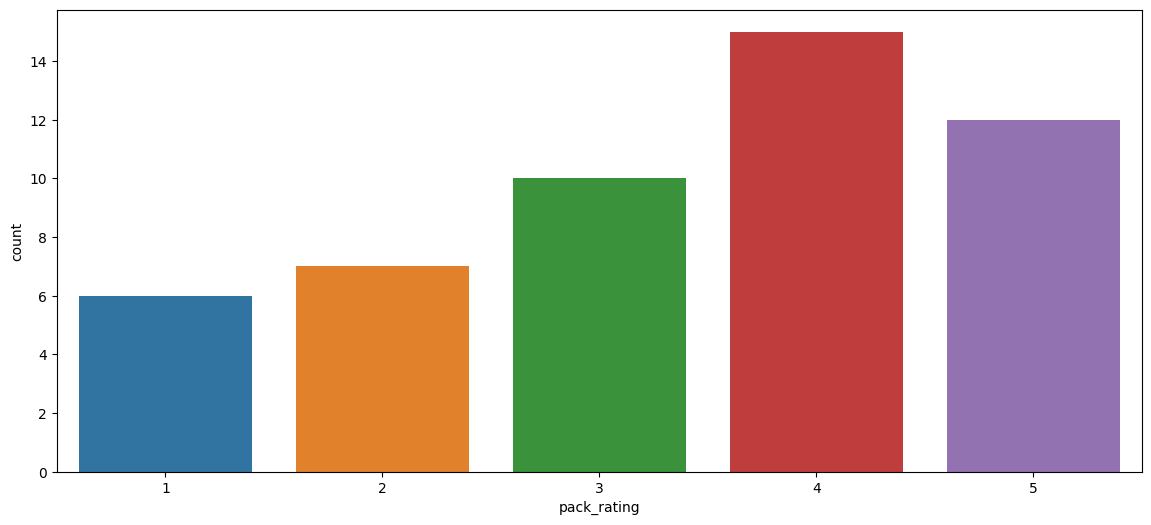

In [75]:
# Visualizing with the pack_rating column
pack_ratings=ratings['pack_rating'].value_counts()

dims = (14, 6)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x=ratings.pack_rating)

In [76]:
# Number of users
print('The ratings dataset has', ratings['user_id'].nunique(), 'unique users')

# Number of package
print('The ratings dataset has', ratings['pack_id'].nunique(), 'unique package')

# Number of ratings
print('The ratings dataset has', ratings['pack_rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings['pack_rating'].unique()))

The ratings dataset has 30 unique users
The ratings dataset has 5 unique package
The ratings dataset has 5 unique ratings
The unique ratings are [1, 2, 3, 4, 5]


In [111]:
# Merge ratings and package datasets
df = pd.merge(ratings, pack, on='pack_id', how='inner')

# Take a look at the df
df.head()


,rating_id,user_id,pack_id,pack_rating,package_name
0,1,1,1,4,Combo Program 1
1,2,3,1,2,Combo Program 1
2,15,7,1,3,Combo Program 1
3,16,9,1,4,Combo Program 1
4,28,14,1,5,Combo Program 1


In [112]:
# Load data from DataFrame
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'pack_id', 'pack_rating']], reader)


In [117]:
average_ratings = pd.DataFrame(data.raw_ratings, columns=['user_id', 'pack_id', 'pack_rating', 'timestamp'])
average_ratings = average_ratings.groupby('pack_id')['pack_rating'].mean().reset_index()
average_ratings.head(10)

,pack_id,pack_rating
0,1,3.333333
1,2,3.307692
2,3,3.700000
3,4,3.666667
4,5,3.000000


In [13]:
# # Dividing the dataset into training data and test data
# trainset = data.build_full_trainset()

# Split the dataset into training set and test set
# trainset, testset = train_test_split(data, test_size=0.2)

### SVD MODEL

In [118]:
# Train SVD models
reg_param = 0.02
model = SVD(reg_all=reg_param)


In [119]:
cv_results = cross_validate(model, data, measures=['RMSE', 'MAE','MSE'], cv=5, verbose=True)


Evaluating RMSE, MAE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0778  1.5055  1.1923  1.6227  1.4568  1.3710  0.2033  
MAE (testset)     0.8479  1.2441  0.9587  1.4859  1.3394  1.1752  0.2376  
MSE (testset)     1.1617  2.2666  1.4215  2.6331  2.1223  1.9210  0.5465  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


In [120]:
# Extract the average scores from cross-validation results
avg_rmse = np.mean(cv_results['test_rmse'])
avg_mae = np.mean(cv_results['test_mae'])
avg_mse = np.mean(cv_results['test_mse'])

# Print the average scores
print("Cross-Validation - Average RMSE:", avg_rmse)
print("Cross-Validation - Average MAE:", avg_mae)
print("Cross-Validation - Average MSE:", avg_mse)

Cross-Validation - Average RMSE: 1.3710132016342593
Cross-Validation - Average MAE: 1.1752175530761388
Cross-Validation - Average MSE: 1.9210200343343657


In [121]:
# Adjust the regularization parameter and re-evaluate
reg_param = 0.1
model.reg_all = reg_param

# Train the model on the full dataset
trainset = data.build_full_trainset()
model.fit(trainset)

In [122]:
# Predict on the training set
train_predictions = model.test(trainset.build_testset())

# Calculate training set errors
train_rmse = accuracy.rmse(train_predictions)
train_mae = accuracy.mae(train_predictions)
train_mse = accuracy.mse(train_predictions)

# Print training set errors
print("Training Set - RMSE:", train_rmse)
print("Training Set - MAE:", train_mae)
print("Training Set - MSE:", train_mse)
# Predict on the test set
testset = trainset.build_testset()
test_predictions = model.test(testset)

# Calculate test set errors
test_rmse = accuracy.rmse(test_predictions)
test_mae = accuracy.mae(test_predictions)
test_mse = accuracy.mse(test_predictions)

# Print test set errors
print("Test Set - RMSE:", test_rmse)
print("Test Set - MAE:", test_mae)
print("Test Set - MSE:", test_mse)

RMSE: 0.9374
MAE:  0.8033
MSE: 0.8787
Training Set - RMSE: 0.9373784613109493
Training Set - MAE: 0.8033431361931178
Training Set - MSE: 0.8786783797296829
RMSE: 0.9374
MAE:  0.8033
MSE: 0.8787
Test Set - RMSE: 0.9373784613109493
Test Set - MAE: 0.8033431361931178
Test Set - MSE: 0.8786783797296829


In [123]:
user_id = 1
pack_id = 4
predicted_rating = model.predict(user_id, pack_id).est
print("Predicted rating:", predicted_rating)


Predicted rating: 3.2820428366483267


### RECOMENDER SYSTEM

In [128]:
#if user exist in rating user_id

def get_top_recommendations(user_id, model, data):
    all_pack_ids = list(data.df['pack_id'].unique())  # Get all unique pack IDs

    # Predict ratings for each pack and store them in a dictionary
    predicted_ratings = {}
    for pack_id in all_pack_ids:
        predicted_rating = model.predict(user_id, pack_id).est
        predicted_ratings[pack_id] = predicted_rating

    # Sort the predicted ratings in descending order
    sorted_ratings = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)

    # Get the top 4 recommendations
    top_recommendations = sorted_ratings[:4]

    return top_recommendations
    
#if user not exist in rating user_id
def get_top_popular_packs(data):
    # Get the list of all pack IDs
    all_pack_ids = list(data.df['pack_id'].unique())  # Get all unique pack IDs

    # Calculate the popularity of each pack (e.g., based on the number of ratings or interactions)
    pack_popularity = {}
    for pack_id in all_pack_ids:
        pack_popularity[pack_id] = len(data.df[data.df['pack_id'] == pack_id])

    # Sort the pack popularity in descending order
    sorted_popularity = sorted(pack_popularity.items(), key=lambda x: x[1], reverse=True)

    # Get the top 4 most popular packs as recommendations
    top_recommendations = sorted_popularity[:4]

    return top_recommendations

#get avg ratings
# def calculate_average_ratings(data):
#     # Group the data by pack_id and calculate the average rating for each item
#     all_pack_ids = list(data.df['pack_id'])
#     all_pack_ratings = list(data.df['pack_rating'])
#     average_ratings = {}

#     for pack_id, pack_rating in zip(all_pack_ids, all_pack_ratings):
#         if pack_id in average_ratings:
#             average_ratings[pack_id]['total_rating'] += pack_rating
#             average_ratings[pack_id]['count'] += 1
#         else:
#             average_ratings[pack_id] = {'total_rating': pack_rating, 'count': 1}

#     for pack_id in average_ratings:
#         average_ratings[pack_id]['average_rating'] = average_ratings[pack_id]['total_rating'] / average_ratings[pack_id]['count']

#     return average_ratings




In [129]:
def user_based_cf(data, user_id):
    # Get the list of all user IDs
    all_user_ids = list(data.df['user_id'].unique())  # Get all unique user IDs

    # Check if the given user_id exists in the dataset
    if user_id in all_user_ids:
      top_recommendations = get_top_recommendations(user_id, model, data)
      for pack_id, predicted_rating in top_recommendations:
        print(f"Pack ID: {pack_id}, Predicted Rating: {predicted_rating}")
    else:
      # Example usage
      top_popular_packs = get_top_popular_packs(data)

      # Print the top recommendations
      for pack_id, popularity in top_popular_packs:
        print(f"Pack ID: {pack_id}, Popularity: {popularity}")


In [131]:
def user_based_cf(data, user_id):
    # Get the list of all user IDs
    all_user_ids = list(data.df['user_id'].unique())  # Get all unique user IDs

    # Check if the given user_id exists in the dataset
    if user_id in all_user_ids:
        top_recommendations = get_top_recommendations(user_id, model, data)
        for pack_id, predicted_rating in top_recommendations:
            # Retrieve the average rating for the pack_id
            avg_rating = average_ratings.loc[average_ratings['pack_id'] == pack_id, 'pack_rating'].iloc[0]
            print(f"Pack ID: {pack_id}, Predicted Rating: {predicted_rating}, Average Rating: {avg_rating}")
    else:
        # Example usage
        top_popular_packs = get_top_popular_packs(data)

        # Print the top recommendations
        for pack_id, popularity in top_popular_packs:
            # Retrieve the average rating for the pack_id
            avg_rating = average_ratings.loc[average_ratings['pack_id'] == pack_id, 'pack_rating'].iloc[0]
            print(f"Pack ID: {pack_id}, Popularity: {popularity}, Average Rating: {avg_rating}")


In [136]:
user_id = 31
user_based_cf(data, user_id)

Pack ID: 2, Popularity: 13, Average Rating: 3.3076923076923075
Pack ID: 3, Popularity: 10, Average Rating: 3.7
Pack ID: 1, Popularity: 9, Average Rating: 3.3333333333333335
Pack ID: 4, Popularity: 9, Average Rating: 3.6666666666666665
